##  k - Nearest  Neighbors


- In <i>k-NN classification</i>, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.


- <i>In k-NN regression</i>, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

### Classification

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn import neighbors
from sklearn import datasets

In [56]:
# import data
iris = datasets.load_iris()
print(iris['feature_names'])
print(iris['target_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


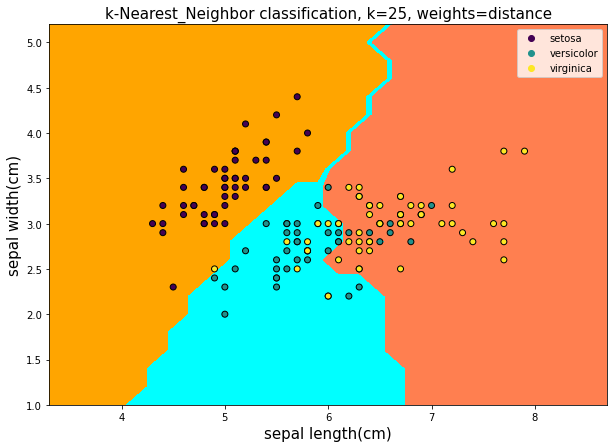

In [74]:
# Lets use only two features['sepal length (cm)', 'sepal width (cm)'] 
X = iris.data[:, :2]
y = iris.target

# define the number of neighbors
n_neighbors = 25

# define the model
knn_model = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
# fit the model
knn_model.fit(X, y)

# plot show the regions belonging to different targets
fig, ax = plt.subplots(figsize=(10,7))

# data for prediction
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
cmap = mcolors.ListedColormap(['orange', 'cyan', 'coral'])

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
_ = ax.contourf(xx, yy, Z, cmap=cmap)
sc = ax.scatter(x=X[:,0], y=X[:,1], c=y, edgecolor='black')
_ = ax.legend(handles=sc.legend_elements()[0], labels=['setosa', 'versicolor', 'virginica'])
_ = ax.set_title('k-Nearest_Neighbor classification, k=25, weights=distance', fontsize=15)
_ = ax.set_xlabel('sepal length(cm)', fontsize=15)
_ = ax.set_ylabel('sepal width(cm)', fontsize=15)